In [141]:
import pandas as pd
import numpy as np




# ----- HELPER FUNCTIONS ----

def _create_df_dummy_states(df, state_col_name):
    return pd.get_dummies(df[state_col_name], prefix='ST:')

def _drop_cols(df, col_names):
    for col in col_names:
        df = df.drop(col, axis = 1)
    return df


## ------ CLEANING FEATURES ----- #

def clean_reformat_features(filepath):

    df = pd.read_csv(filepath)

    #state dummies
    states = _create_df_dummy_states(df, "State_master")
    #if state dummies missing a state, add the column with all zeros
    all_states = ['ST:_Alabama', 'ST:_Alaska', 'ST:_Arizona', 'ST:_Arkansas',
       'ST:_California', 'ST:_Colorado', 'ST:_Connecticut', 'ST:_Delaware',
       'ST:_District of Columbia', 'ST:_Florida', 'ST:_Georgia', 'ST:_Idaho',
       'ST:_Illinois', 'ST:_Indiana', 'ST:_Iowa', 'ST:_Kansas', 'ST:_Kentucky',
       'ST:_Louisiana', 'ST:_Maine', 'ST:_Maryland', 'ST:_Massachusetts',
       'ST:_Michigan', 'ST:_Minnesota', 'ST:_Mississippi', 'ST:_Missouri',
       'ST:_Montana', 'ST:_Nebraska', 'ST:_Nevada', 'ST:_New Hampshire',
       'ST:_New Jersey', 'ST:_New Mexico', 'ST:_New York',
       'ST:_North Carolina', 'ST:_North Dakota', 'ST:_Ohio', 'ST:_Oklahoma',
       'ST:_Oregon', 'ST:_Pennsylvania', 'ST:_Rhode Island',
       'ST:_South Carolina', 'ST:_South Dakota', 'ST:_Tennessee', 'ST:_Texas',
       'ST:_Utah', 'ST:_Vermont', 'ST:_Virginia', 'ST:_Washington',
       'ST:_West Virginia', 'ST:_Wisconsin', 'ST:_Wyoming', 'ST:_Hawaii']
    for state_col in all_states:
         if state_col not in states.columns:
             states[state_col] = [0] * states.shape[0]

    df = df.join(states)
    df = _drop_cols(df, ['State_master', 'ST:_Hawaii'])



    #reduce ages into fewer Grps(otherwise high correlation)
    df['Age:0-14'] = df['AgeGrp01:0-4:2010'] +  df['AgeGrp02:5-9:2010'] + df['AgeGrp03:10-14:2010']
    df['Age:15-24'] = df['AgeGrp04:15-19:2010'] +  df['AgeGrp05:20-24:2010']
    df['Age:25-44'] = df['AgeGrp06:25-29:2010'] +  df['AgeGrp07:30-34:2010'] + df['AgeGrp08:35-39:2010'] +  df['AgeGrp09:40-44:2010']
    df['Age:45+'] = df['AgeGrp10:45-49:2010'] + df['AgeGrp11:50-54:2010'] + df['AgeGrp12:55-59:2010'] + df['AgeGrp13:60-64:2010'] + df['AgeGrp14:65-69:2010'] + df['AgeGrp15:70-74:2010'] + df['AgeGrp16:75-79:2010'] + df['AgeGrp17:80-84:2010'] + df['AgeGrp18:85+:2010']

    dropped_ages = ['AgeGrp01:0-4:2010', 'AgeGrp02:5-9:2010', 'AgeGrp03:10-14:2010',
       'AgeGrp04:15-19:2010', 'AgeGrp05:20-24:2010',
       'AgeGrp06:25-29:2010', 'AgeGrp07:30-34:2010',
       'AgeGrp08:35-39:2010', 'AgeGrp09:40-44:2010',
       'AgeGrp10:45-49:2010', 'AgeGrp11:50-54:2010',
       'AgeGrp12:55-59:2010', 'AgeGrp13:60-64:2010',
       'AgeGrp14:65-69:2010', 'AgeGrp15:70-74:2010',
       'AgeGrp16:75-79:2010', 'AgeGrp17:80-84:2010', 'AgeGrp18:85+:2010']

    df = _drop_cols(df, dropped_ages)

    #add % male feature
    df["Male_pct_2010"] =  (df["TOT_MALE"] / df["TOT_POP"])*100
    df = _drop_cols(df, ['TOT_MALE'])

    #create rate change features for diabetes and obesity, remove non-needed
    df['DB:2009-2010:Rate_Change'] = (df["DB:2010:percent"] - df['DB:2009:percent']) / df['DB:2009:percent']
    df['OB:2009-2010:Rate_Change'] = (df["OB:2010:percent"] - df['OB:2009:percent']) / df['OB:2009:percent']
    df['LI:2009-2010:Rate_Change'] = (df["LI:2010:percent"] - df['LI:2009:percent']) / df['LI:2009:percent']

    df = _drop_cols(df, ['DB:2009:percent', 'OB:2009:percent', 'LI:2009:percent'])

    #reformat census columns
    # --> combine male.female into one
    census_col_prefixes = ['BAC', 'IAC', 'AAC', 'NAC', 'H']
    for race in census_col_prefixes:
        df['CEN:2010:' + race] = (df[race + '_MALE'] + df[race + '_FEMALE']) / df["TOT_POP"]
        df = _drop_cols(df, [race + '_MALE', race + '_FEMALE'])
    # --> remove columns no longer needed (WAC was heavily correlated with BAC, BAC performed better)
    df = _drop_cols(df, ['TOT_POP', 'WAC_MALE', 'WAC_FEMALE'])

    #fill in missing values *only 5 in training and test set, across differnet rows
    df.fillna(df.mean(), inplace = True)

    return df



if __name__ == '__main__':
    filepath_X = '../data/X_train.csv'
    X_train = clean_reformat_features(filepath_X)
    filepath_y = '../data/y_train.csv'
    y_train = pd.read_csv(filepath_y)

'''



def scale_data()
scalar = StandardScaler()


#SCALE!

FOR MODEL FIT / TRNAFORMS --> MUST SCALE DATA THERE!!!!! (BC MUST BE FIT TO TRIAN)

'''


'\n\n\n\ndef scale_data()\nscalar = StandardScaler()\n\n\n#SCALE!\n\nFOR MODEL FIT / TRNAFORMS --> MUST SCALE DATA THERE!!!!! (BC MUST BE FIT TO TRIAN)\n\n'

In [142]:
filepath_Xtest = '../data/X_test.csv'
X_test = clean_reformat_features(filepath_Xtest)
filepath_ytest = '../data/y_test.csv'
y_test = pd.read_csv(filepath_ytest)

In [15]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [55]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error 


# 0 Average

In [52]:
avg = y_train.mean()
avg

y_train    5.376988
dtype: float64

In [53]:
y_pred_avg = np.array([avg] * X_train.shape[0])
y_pred_avg

array([[5.3769882],
       [5.3769882],
       [5.3769882],
       ...,
       [5.3769882],
       [5.3769882],
       [5.3769882]])

In [56]:
avg_model_mse = mean_squared_error(y_train, y_pred_avg)
avg_model_mse

140.22171307415687

# 1 SCALE DATA!!

In [18]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

# RIDGE: GRID SEARCH!

In [27]:
ridge = Ridge(random_state=50)

In [29]:
alpha = [.01, .05, .1, .25, .5, 1.0, 1.5, 3.0, 5.0, 8.0, 10.0, 20.0, 30.0, 50.0]  #larger values stronger regulation
solver = ['svd', 'cholesky', 'lsqr','sag', 'saga']
max_iter = [None, 200, 500, 1000, 2000, 5000]

random_grid = {'alpha': alpha,
               'solver': solver, 
              "max_iter" : max_iter}
print(random_grid)

{'alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 1.0, 1.5, 3.0, 5.0, 8.0, 10.0, 20.0, 30.0, 50.0], 'solver': ['svd', 'cholesky', 'lsqr', 'sag', 'saga'], 'max_iter': [None, 200, 500, 1000, 2000, 5000]}


In [30]:
ridgegrid = GridSearchCV(ridge, param_grid=random_grid, cv=3, scoring = 'neg_mean_squared_error')
ridgegrid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=50, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 1.0, 1.5, 3.0, 5.0, 8.0, 10.0, 20.0, 30.0, 50.0], 'solver': ['svd', 'cholesky', 'lsqr', 'sag', 'saga'], 'max_iter': [None, 200, 500, 1000, 2000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [31]:
ridgegrid.best_params_

{'alpha': 10.0, 'max_iter': None, 'solver': 'cholesky'}

In [32]:
ridgegrid.best_score_

-101.70832375844401

In [37]:
ridgebest = Ridge(alpha =  10.0, max_iter = None, solver = 'cholesky')


In [116]:
score = cross_val_score(ridgebest, X_train_scaled, y_train, cv = 2, scoring = 'neg_mean_squared_error' )
print(score.mean())
score

-103.5202556876909


array([-102.09715666, -104.94335472])

In [111]:
ridgebest.fit(X_train_scaled, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [113]:
(abs(ridgebest.coef_) > 1.5).sum()

11

In [163]:
y_pred = ridgebest.predict(X_test_scaled)

In [164]:
mean_squared_error(y_test, y_pred)

136.76797347251218

# LASSO: GRID SEARCH!

In [42]:
lasso = Lasso(random_state=50)

In [45]:
alpha = [.01, .025, .05, .1, .25, .5, 1, 1.5, 2, 3, 5, 10, 20, 30, 50]
max_iter = [200, 500, 1000, 2000, 5000]

random_grid = {'alpha': alpha,
               'max_iter': max_iter}
print(random_grid)

{'alpha': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5, 10, 20, 30, 50], 'max_iter': [200, 500, 1000, 2000, 5000]}


In [47]:
lassogrid = GridSearchCV(lasso, param_grid=random_grid, cv=3, scoring = 'neg_mean_squared_error')
lassogrid.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=50,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5, 10, 20, 30, 50], 'max_iter': [200, 500, 1000, 2000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
lassogrid.best_params_

{'alpha': 0.05, 'max_iter': 200}

In [51]:
lassogrid.best_score_

-101.28416419401209

In [190]:
lassobest = Lasso(alpha =  .5, max_iter = 1000)


In [191]:
score = cross_val_score(lassobest, X_train_scaled, y_train, cv = 2, scoring = 'neg_mean_squared_error' )
print(score.mean())
score

-111.75042633643307


array([-106.59523631, -116.90561636])

In [195]:
lassobest.fit(X_train_scaled, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
lassobest.coef_

array([-3.64450749e+00,  1.55665931e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.42987506e+00,  0.00000000e+00,  1.72281642e-01,
       -6.03379698e-01, -0.00000000e+00,  4.38763941e-01, -6.34028273e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.35821004e-01,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -4.01538510e-01,  0.00000000e+00,  1.49867099e-01,
        7.28662456e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.99316458e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.79902870e-02,  0.00000000e+00, -0.00000000e+00,
        3.14980997e-01,  0.00000000e+00,  6.45190145e-02,  0.00000000e+00,
        0.00000000e+00,  1.24980436e-01, -0.00000000e+00,  5.47345306e-01,
       -1.16139977e+00, -

In [202]:
(abs(lassobest.coef_) > .5).sum()

10

In [203]:
X_train.columns[abs(lassobest.coef_) > .5]

Index(['DB:2010:percent', 'UnemploymentRate:2010', 'LI:2010:percent',
       'Alcohol:Any:2010', 'ST:_Alaska', 'ST:_Iowa', 'ST:_Tennessee',
       'ST:_Texas', 'DB:2009-2010:Rate_Change', 'CEN:2010:H'],
      dtype='object')

In [106]:
lassobest.coef_[abs(lassobest.coef_) > 1]

array([-7.92489904,  2.26128023,  1.84931197,  1.44797427, -2.17311335,
       -1.40484532, -1.18070471, -1.00593322,  1.00750512, -1.09419104,
       -1.87679703,  1.34204478, -1.20593757])

In [119]:
for i in zip(lassobest.coef_[abs(lassobest.coef_) > 1], X_train.columns[abs(lassobest.coef_) > 1]):
    print (i)

(-7.924899040205686, 'DB:2010:percent')
(2.2612802299019394, 'UnemploymentRate:2010')
(1.8493119680463288, 'LI:2010:percent')
(1.4479742705915162, 'Rural_percent_2010')
(-2.1731133546859183, 'Alcohol:Any:2010')
(-1.4048453154647444, 'ST:_Alaska')
(-1.1807047114053997, 'ST:_Colorado')
(-1.005933217754181, 'ST:_Idaho')
(1.007505119508163, 'ST:_Iowa')
(-1.0941910351551556, 'ST:_Texas')
(-1.8767970321165168, 'DB:2009-2010:Rate_Change')
(1.3420447768683614, 'CEN:2010:BAC')
(-1.205937572703344, 'CEN:2010:H')


In [159]:
X_test_scaled = scalar.transform(X_test)

In [193]:
y_pred = lassobest.predict(X_test_scaled)

In [194]:
mean_squared_error(y_test, y_pred)

125.3111334211078

In [143]:
X_test.shape

(943, 73)

In [127]:
X_train.shape

(2199, 73)

Index(['DB:2010:percent', 'UnemploymentRate:2010', 'PCT_LACCESS_POP10',
       'FFRPTH09', 'Poverty_Rate_2010', 'LI:2010:percent', 'OB:2010:percent',
       'Rural_percent_2010', 'Alcohol:Any:2010', 'Alcohol:Heavy:2010',
       'ST:_Alabama', 'ST:_Alaska', 'ST:_Arizona', 'ST:_Arkansas',
       'ST:_California', 'ST:_Colorado', 'ST:_Connecticut', 'ST:_Florida',
       'ST:_Georgia', 'ST:_Idaho', 'ST:_Illinois', 'ST:_Indiana', 'ST:_Iowa',
       'ST:_Kansas', 'ST:_Kentucky', 'ST:_Louisiana', 'ST:_Maine',
       'ST:_Maryland', 'ST:_Massachusetts', 'ST:_Michigan', 'ST:_Minnesota',
       'ST:_Mississippi', 'ST:_Missouri', 'ST:_Montana', 'ST:_Nebraska',
       'ST:_Nevada', 'ST:_New Hampshire', 'ST:_New Jersey', 'ST:_New Mexico',
       'ST:_New York', 'ST:_North Carolina', 'ST:_North Dakota', 'ST:_Ohio',
       'ST:_Oklahoma', 'ST:_Oregon', 'ST:_Pennsylvania', 'ST:_Rhode Island',
       'ST:_South Carolina', 'ST:_South Dakota', 'ST:_Tennessee', 'ST:_Texas',
       'ST:_Utah', 'ST:_Vermont

In [137]:
X_train.columns[X_train.columns.str.startswith("ST:")]


Index(['ST:_Alabama', 'ST:_Alaska', 'ST:_Arizona', 'ST:_Arkansas',
       'ST:_California', 'ST:_Colorado', 'ST:_Connecticut', 'ST:_Delaware',
       'ST:_District of Columbia', 'ST:_Florida', 'ST:_Georgia', 'ST:_Idaho',
       'ST:_Illinois', 'ST:_Indiana', 'ST:_Iowa', 'ST:_Kansas', 'ST:_Kentucky',
       'ST:_Louisiana', 'ST:_Maine', 'ST:_Maryland', 'ST:_Massachusetts',
       'ST:_Michigan', 'ST:_Minnesota', 'ST:_Mississippi', 'ST:_Missouri',
       'ST:_Montana', 'ST:_Nebraska', 'ST:_Nevada', 'ST:_New Hampshire',
       'ST:_New Jersey', 'ST:_New Mexico', 'ST:_New York',
       'ST:_North Carolina', 'ST:_North Dakota', 'ST:_Ohio', 'ST:_Oklahoma',
       'ST:_Oregon', 'ST:_Pennsylvania', 'ST:_Rhode Island',
       'ST:_South Carolina', 'ST:_South Dakota', 'ST:_Tennessee', 'ST:_Texas',
       'ST:_Utah', 'ST:_Vermont', 'ST:_Virginia', 'ST:_Washington',
       'ST:_West Virginia', 'ST:_Wisconsin', 'ST:_Wyoming'],
      dtype='object')

In [165]:
# FINAL: RANDOM FOREST

In [168]:
from sklearn.ensemble import RandomForestRegressor


In [489]:
rfbest = RandomForestRegressor(max_depth = 20, min_samples_leaf = 5, n_estimators = 500, oob_score = True)

In [490]:
rfbest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [491]:
y_pred = rfbest.oob_prediction_
mean_squared_error(y_pred, y_train)

111.2491430159424

In [492]:
#with test set

In [493]:
y_pred = rfbest.predict(X_test)
mean_squared_error(y_pred, y_test)

122.54953768082021

# My Diabets Model

In [239]:

class Diabetes_Rate_Model():

    def __init__(self):
        self.scalar = StandardScaler()
        self.modellinear =  Lasso(alpha =  .5, max_iter = 1000)
        self.modelensemble = RandomForestRegressor(max_depth = 20, min_samples_leaf = 5, n_estimators = 1000)
        self.mse_avg = None

    def fit_linear(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

        self.scalar.fit(X_train)
        self.X_train_scaled = self.scalar.transform(X_train)
        self.modellinear.fit(self.X_train_scaled, self.y_train)
        if not self.mse_avg:
            yavg = self.y_train.mean()
            y_pred_avg = np.array([yavg] * self.X_train.shape[0])
            self.mse_avg = mean_squared_error(y_train, y_pred_avg)


    def predict_linear(self, X):
        X_scaled = self.scalar.transform(X)
        return self.modellinear.predict(X_scaled)


    def fit_ensemble(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.modelensemble.fit(self.X_train, self.y_train)
        if not self.mse_avg:
            yavg = self.y_train.mean()
            y_pred_avg = np.array([yavg] * self.X_train.shape[0])
            self.mse_avg = mean_squared_error(y_train, y_pred_avg)

    def predict_ensemble(self, X):
        return self.modelensemble.predict(X)

    def mse(self, y_true, y_pred):
        return mean_squared_error(y_true, y_pred)

    def mse_pct_improvement(self, y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        return (mse - self.mse_avg) / self.mse_avg


In [240]:
model = Diabetes_Rate_Model()

In [223]:
model.fit_linear(X_train, y_train)

In [224]:
model.predict_linear(X_test)

array([ 7.94777024e+00, -1.84634493e-01,  5.44952025e+00,  1.46769278e+00,
        2.33929988e+00,  7.84707647e+00,  9.30094262e+00,  7.89727358e+00,
        5.58442684e+00,  7.07314420e+00,  6.94427463e+00,  1.22924517e+01,
        8.01382846e+00,  6.77381127e+00,  1.00990800e+01,  7.53106716e+00,
        5.89985275e+00,  4.49023699e+00,  6.83200844e+00,  7.05703954e+00,
        5.80088121e+00,  3.10938043e+00,  2.37948703e+00,  9.14542840e+00,
        6.91444671e+00,  6.11648409e+00,  7.24026546e+00,  7.53726666e+00,
        7.66514693e+00,  4.07066488e+00,  1.03498664e+01,  7.00336051e+00,
        4.81680551e+00,  1.29223540e+01,  6.82195262e+00,  6.01461388e+00,
        6.07158623e+00,  1.69898362e+00,  1.46607376e+01,  4.04001371e+00,
        5.10372982e+00,  2.64827440e+00,  1.30910783e+01,  2.66154297e+00,
        5.32876048e+00,  7.29710954e+00,  1.02587595e+01,  5.87721399e+00,
        4.58641488e+00, -1.22842611e+00,  1.63692272e+00,  6.20176072e+00,
        6.04836750e+00,  

In [225]:
model.mse(y_test, model.predict_linear(X_test))

125.3111334211078

In [228]:
model.mse_pct_improvement(y_test, model.predict_linear(X_test))

-0.1063357402085335

In [242]:
model.fit_ensemble(X_train, y_train)

In [244]:
model.predict_ensemble(X_test)

array([ 6.85947434e+00, -1.46606595e+00,  1.74833674e+00,  1.80330800e+00,
        3.88586420e+00,  5.96312004e+00,  1.00172811e+01,  7.24138273e+00,
        5.98479018e+00,  9.86489999e+00,  7.39805897e+00,  9.44466257e+00,
        8.54985530e+00,  1.22735739e+01,  1.17400878e+01,  1.20489362e+01,
        6.57246115e+00,  3.30888844e+00,  9.43379342e+00,  5.02811324e+00,
       -2.54784058e+00,  1.50464365e-01,  2.89150968e+00,  5.52297260e+00,
        8.74270562e+00,  4.15302241e+00,  4.50354889e+00,  7.46508213e+00,
        6.44895381e+00,  2.28576138e+00,  1.00771065e+01,  6.38091224e+00,
        3.26893892e+00,  1.13432663e+01,  8.27444296e+00,  3.89938359e+00,
        3.75221543e+00,  4.27045612e-01,  1.54299095e+01,  6.47559288e+00,
        3.61592961e+00,  3.04942918e+00,  1.25055712e+01,  4.02104904e+00,
        7.14518909e+00,  6.28483220e+00,  1.31021627e+01,  4.61330592e+00,
        7.76353909e+00, -9.35179975e-01,  3.47404841e+00,  2.61992909e+00,
        9.20280720e+00,  

In [245]:
model.mse(y_test, model.predict_ensemble(X_test))

122.98331767017042

In [246]:
model.mse_pct_improvement(y_test, model.predict_ensemble(X_test))

-0.12293670520820013

In [248]:
X_train.shape

(2199, 73)

In [249]:
X_test.shape

(943, 73)

In [250]:
y_train.mean()

y_train    5.376988
dtype: float64

In [251]:
y_test.shape

(943, 1)

In [253]:
avg_test = [5.376988] * 943

In [254]:
mse = mean_squared_error(y_test, avg_test)
#mse - self.mse_avg) / self.mse_avg

In [255]:
mse

147.1089233642011

# PLOT LASSO COEFFICIENTS

In [295]:
lassocoefs = lassobest.coef_

In [330]:
plt_coefs_df = pd.DataFrame.from_dict({"features" : X_train.columns,
                             "coefficients" : lassocoefs })

In [332]:
plt_coefs_df = plt_coefs_df.reindex(plt_coefs_df["coefficients"].abs().sort_values().index)[::-1]


In [399]:
plt_coefs_df["color"] = plt_coefs_df["coefficients"].apply(lambda x: "tomato" if  x > 0 else "teal")



In [421]:
plt_coefs_df["labels"] = plt_coefs_df["features"]

In [423]:
plt_coefs_df["labels"][:10] 

0              DB:2010:percent
65    DB:2009-2010:Rate_Change
1        UnemploymentRate:2010
5              LI:2010:percent
52                   ST:_Texas
24                    ST:_Iowa
11                  ST:_Alaska
72                  CEN:2010:H
8             Alcohol:Any:2010
51               ST:_Tennessee
Name: labels, dtype: object

In [426]:
plt_coefs_df["labels"][:10] = ["Diabetes Rate in 2010", "Change in Diabetes Rate 2009-2010", 
                               "Unemployment Rate 2010", "Leisure Inactivity Rate 2010", 
                              "Texas", "Iowa", "Alaska", "Percent Hispanic 2010", "Any Alcohol Use 2010", "Tennesse"]

In [333]:
import seaborn as sns

Text(0.5, 1.0, 'Features with highest impact on Linear Model')

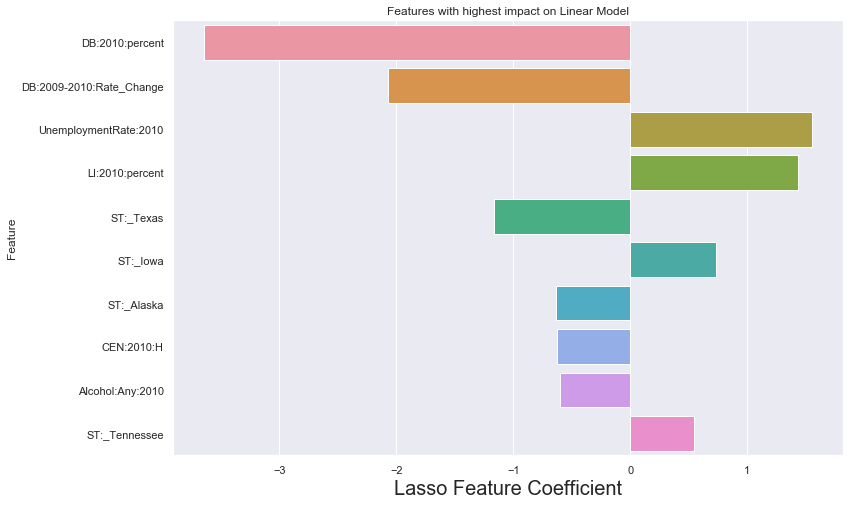

In [370]:
sns.set() 
sns.set_palette("RdBu")
plt.figure(figsize = (12, 8))
sns.barplot(x="coefficients", y="features", data=plt_coefs_df.iloc[:10])#hue=["red", "red", ]"color"
plt.xlabel("Lasso Feature Coefficient", size = 20)
#barlist[0].set_color('r')
plt.ylabel("Feature")
plt.title("Features with highest impact on Linear Model")


In [485]:
plt_coefs_df

,features,coefficients,color,labels
0,DB:2010:percent,-3.644507,teal,Diabetes Rate in 2010
65,DB:2009-2010:Rate_Change,-2.070728,teal,Change in Diabetes Rate 2009-2010
1,UnemploymentRate:2010,1.556659,tomato,Unemployment Rate 2010
5,LI:2010:percent,1.429875,tomato,Leisure Inactivity Rate 2010
52,ST:_Texas,-1.161400,teal,Texas
24,ST:_Iowa,0.728662,tomato,Iowa
11,ST:_Alaska,-0.634028,teal,Alaska
72,CEN:2010:H,-0.622408,teal,Percent Hispanic 2010
8,Alcohol:Any:2010,-0.603380,teal,Any Alcohol Use 2010
51,ST:_Tennessee,0.547345,tomato,Tennesse


## FINAL PLOT: LASSO TOP FEATURES

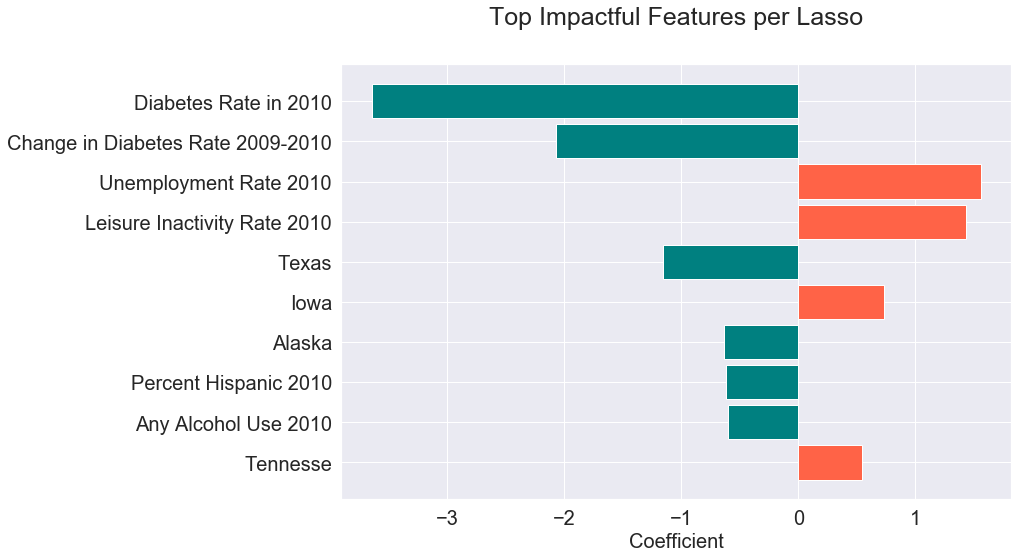

In [541]:
plt.figure(figsize = (12, 8))
plt.barh(plt_coefs_df["labels"].iloc[:10], height = .85, width = plt_coefs_df["coefficients"].iloc[:10],  
        color = plt_coefs_df["color"], align='center')
plt.xlabel("Coefficient", fontsize=20)
#plt.ylabel("Feature", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.title("Top Impactful Features per Lasso", fontsize=25, pad = 40)
#plt.tick_params(axis='both', which='major', labelsize=10)
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.gca().invert_yaxis()


#plt.yticklabels(plt_coefs_df["Features"])
plt.savefig('../images/lassotop10.png', bbox_inches="tight")


# PLOT LASSO PARTIAL DEPENDENCY

In [528]:
#Dependence Plot

#Made it so axis all the same!!

colnamemap = { "DB:2010:percent":"Diabetes Rate in 2010",
    "DB:2009-2010:Rate_Change":"Change in Diabetes Rate 2009-2010",
        "UnemploymentRate:2010": "Unemployment Rate 2010",
             "LI:2010:percent":"Leisure Inactivity Rate 2010",
                   "ST:_Texas":"Texas",
                    "ST:_Iowa":"Iowa",
                  "ST:_Alaska":"Alaska",
"CEN:2010:H":"Percent Hispanic 2010",
"Alcohol:Any:2010":"Any Alcohol Use 2010",
"ST:_Tennessee": "Tennesse"}
    
    
def pdp_same_axis_scale(model, col, num_breaks, ax, y_lim_min, y_lim_max):
    X_train_pdp = X_train.copy()
    
    #get x-axis values
    min_pdp = X_train[col].min()
    max_pdp = X_train[col].max()
    x = np.linspace(0, 100, num_breaks)
    x = x * ((max_pdp - min_pdp)/num_breaks)
    x = x + min_pdp
    
    #get y-axis values
    y = []
    for val in x:
        X_train_pdp[col] = val
        predictions = model.predict(scalar.transform(X_train_pdp))
        y.append(predictions.mean())

    #plot partial dependence
    ax.plot(x, y, linestyle='-', color = "tomato", linewidth=3.0)
    ax.set_xlabel(colnamemap[col], fontsize=16)
    ax.set_ylabel("Avg. Prediction for Diabetes Rate Change")
    ax.set_ylim(y_lim_min, y_lim_max)
    
    #formatting
    #ax.set_xticks(fontsize=14)
    #ax.set_yticks(fontsize=14)


In [529]:
top_10_lasso_feats = plt_coefs_df["features"].iloc[:9]
top_10_lasso_feats

0              DB:2010:percent
65    DB:2009-2010:Rate_Change
1        UnemploymentRate:2010
5              LI:2010:percent
52                   ST:_Texas
24                    ST:_Iowa
11                  ST:_Alaska
72                  CEN:2010:H
8             Alcohol:Any:2010
Name: features, dtype: object

In [530]:
scalar.inverse_transform

<bound method StandardScaler.inverse_transform of StandardScaler(copy=True, with_mean=True, with_std=True)>

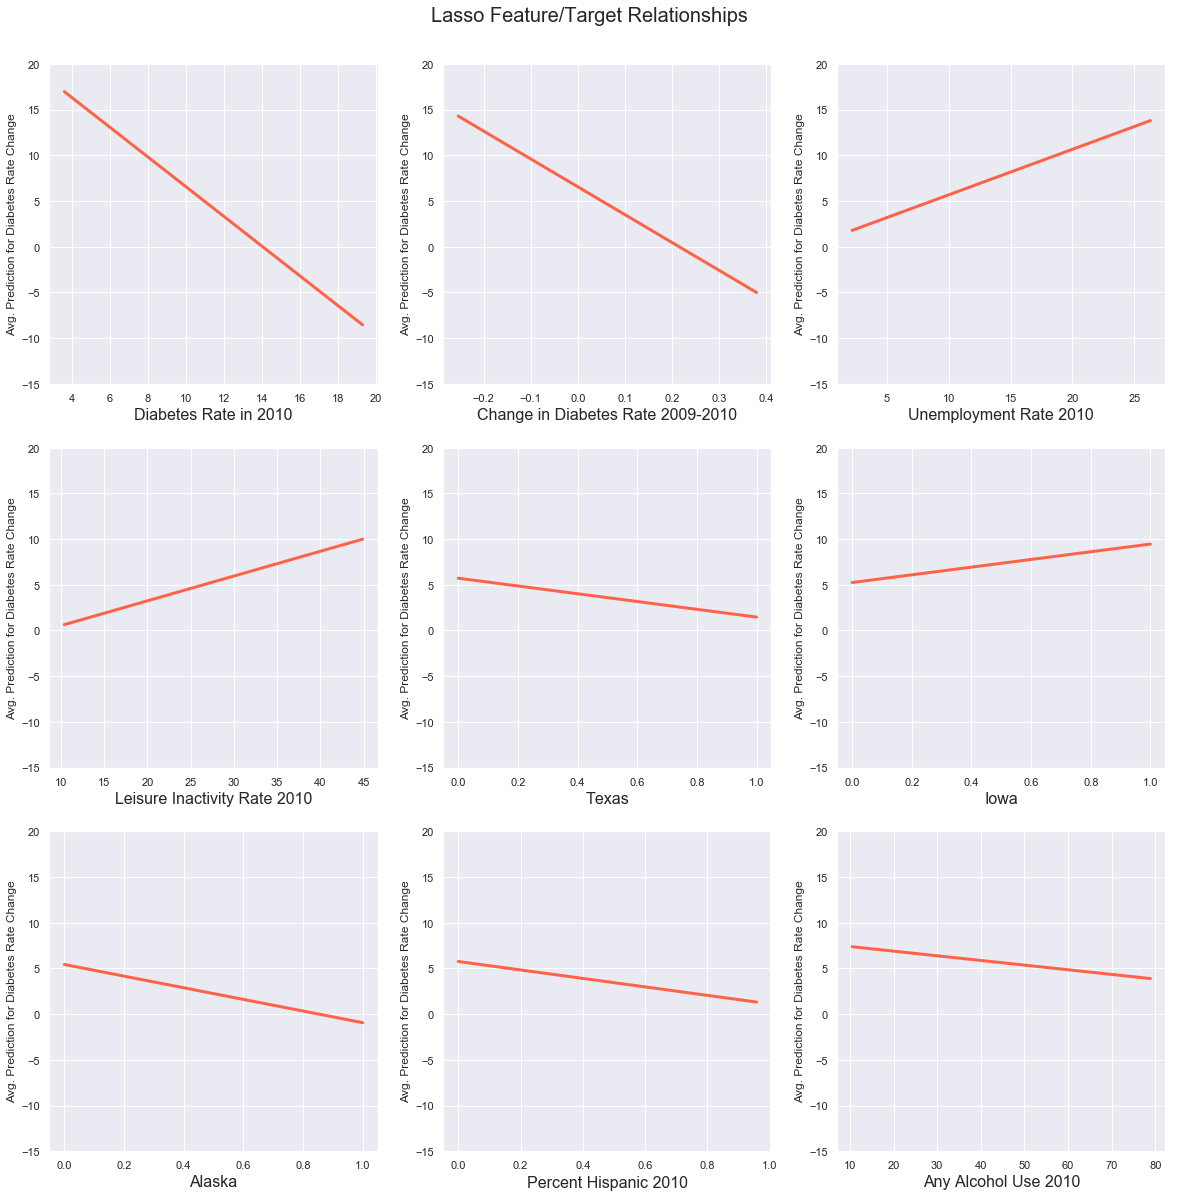

In [531]:
matplotlib.rcParams.update({'font.size': 16})


fig, axs = plt.subplots(3, 3, figsize=(20,20))
af = axs.flatten()
fig.suptitle("Lasso Feature/Target Relationships",  fontsize=20, y = .92)


for i, col in enumerate(top_10_lasso_feats):
    pdp_same_axis_scale(lassobest, col, 100, af[i], -15, 20)
    
fig.subplots_adjust(hspace=.2)

plt.savefig('../images/lassorelationships.png')


# PLOT RANDOM FOREST FEATURE IMPORTANCE

In [535]:
colnamemap = { "DB:2010:percent":"Diabetes Rate in 2010",
    "DB:2009-2010:Rate_Change":"Change in Diabetes Rate 2009-2010",
              "OB:2009-2010:Rate_Change" : "Change in Obesity Rate 2009-2010",
        "UnemploymentRate:2010": "Unemployment Rate 2010",
             "LI:2010:percent":"Leisure Inactivity Rate 2010",
    "LI:2009-2010:Rate_Change":"Change in Leisure Inactivity Rate 2009-2010",

              "OB:2010:percent" : "Obesity Prevalance 2010",
                   "ST:_Texas":"Texas",
                    "ST:_Iowa":"Iowa",
                  "ST:_Alaska":"Alaska",
"CEN:2010:H":"Percent Hispanic 2010",
"Alcohol:Any:2010":"Any Alcohol Use 2010",
              "Alcohol:Heavy:2010":"Heavy Alcohol Use 2010",
"ST:_Tennessee": "Tennesse", 
   "PCT_LACCESS_POP10" : "Low Access to groceries (%) 2010", 
        "FFRPTH09" :    "Fast Food per capita (2009)"  , 
     "Poverty_Rate_2010"    :    "Poverty Rate 2010" , 
          "Male_pct_2010" : "Male (%) 2010"  , 
              "CEN:2010:H" : "Hispanic (%) 2010",
            "Rural_percent_2010" : "Rural (%) 2010" , 
             "ST:_Alabama" : "Alabama", 
        
             
             "CEN:2010:NAC" : "Native Hawaiian / Pactific Islander (%) 2010"
             }




In [503]:
rfimpfeats = rfbest.feature_importances_

In [513]:
plt_impfeats_df = pd.DataFrame.from_dict({"features" : X_train.columns,
                             "feature_importance" : rfimpfeats })

In [523]:
plt_impfeats_df = plt_impfeats_df.reindex(plt_impfeats_df["feature_importance"].abs().sort_values().index)[::-1]


In [524]:
plt_impfeats_df["labels"] = plt_impfeats_df["features"].apply(lambda x: colnamemap[x] if x in colnamemap.keys() else x)

In [525]:
plt_impfeats_df.head(12)

,features,feature_importance,labels
65,DB:2009-2010:Rate_Change,0.136594,Change in Diabetes Rate 2009-2010
0,DB:2010:percent,0.101197,Diabetes Rate in 2010
1,UnemploymentRate:2010,0.051543,Unemployment Rate 2010
5,LI:2010:percent,0.048340,Leisure Inactivity Rate 2010
8,Alcohol:Any:2010,0.046546,Any Alcohol Use 2010
71,CEN:2010:NAC,0.038213,Native Hawaiian / Pactific Islander (%) 2010
66,OB:2009-2010:Rate_Change,0.037492,Change in Obesity Rate 2009-2010
64,Male_pct_2010,0.037327,Male (%) 2010
67,LI:2009-2010:Rate_Change,0.037016,Change in Leisure Inactivity Rate 2009-2010
72,CEN:2010:H,0.036282,Hispanic (%) 2010


In [526]:
plt_impfeats_df["features"][:10] 

65    DB:2009-2010:Rate_Change
0              DB:2010:percent
1        UnemploymentRate:2010
5              LI:2010:percent
8             Alcohol:Any:2010
71                CEN:2010:NAC
66    OB:2009-2010:Rate_Change
64               Male_pct_2010
67    LI:2009-2010:Rate_Change
72                  CEN:2010:H
Name: features, dtype: object

## FINAL PLOT: RANDOM FOREST TOP IMPORTANT FEATURES

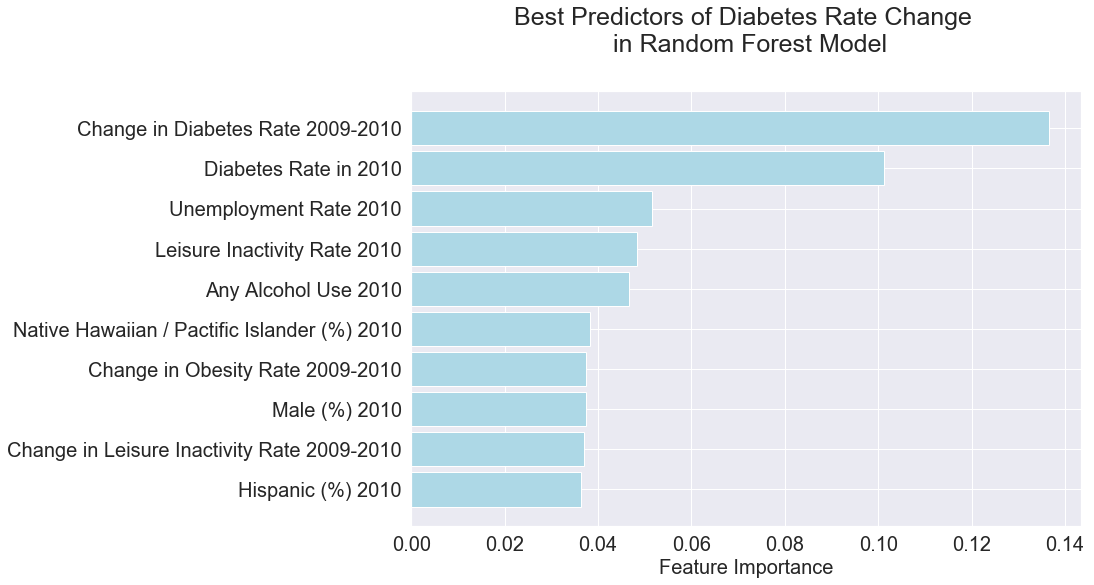

In [543]:
plt.figure(figsize = (12, 8))
plt.barh(plt_impfeats_df["labels"].iloc[:10], height = .85, width = plt_impfeats_df["feature_importance"].iloc[:10],  
        color = "lightblue", align='center')
plt.xlabel("Feature Importance", fontsize=20)
#plt.ylabel("Feature", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.title("Best Predictors of Diabetes Rate Change \n in Random Forest Model", fontsize=25, pad = 40)
#plt.tick_params(axis='both', which='major', labelsize=10)
#plt.tick_params(axis='both', which='minor', labelsize=20)
plt.gca().invert_yaxis()


#plt.yticklabels(plt_coefs_df["Features"])
plt.savefig('../images/rftop10.png', bbox_inches="tight")


# PLOT LASSO PARTIAL DEPENDENCY

In [544]:
#Dependence Plot

#Made it so axis all the same!!

#REMOVED SCALLIN!!!
    
def pdp_same_axis(model, col, num_breaks, ax, y_lim_min, y_lim_max):
    X_train_pdp = X_train.copy()
    
    #get x-axis values
    min_pdp = X_train[col].min()
    max_pdp = X_train[col].max()
    x = np.linspace(0, 100, num_breaks)
    x = x * ((max_pdp - min_pdp)/num_breaks)
    x = x + min_pdp
    
    #get y-axis values
    y = []
    for val in x:
        X_train_pdp[col] = val
        predictions = model.predict(X_train_pdp)
        y.append(predictions.mean())

    #plot partial dependence
    ax.plot(x, y, linestyle='-', color = "lightblue", linewidth=4.0)
    ax.set_xlabel(colnamemap[col], fontsize=20)
    ax.set_ylabel("Avg. Prediction for Diabetes Rate Change")
    ax.set_ylim(y_lim_min, y_lim_max)
    
    #formatting
    #ax.set_xticks(fontsize=14)
    #ax.set_yticks(fontsize=14)


In [532]:
top_9_rf_feats = plt_impfeats_df["features"].iloc[:9]
top_9_rf_feats

65    DB:2009-2010:Rate_Change
0              DB:2010:percent
1        UnemploymentRate:2010
5              LI:2010:percent
8             Alcohol:Any:2010
71                CEN:2010:NAC
66    OB:2009-2010:Rate_Change
64               Male_pct_2010
67    LI:2009-2010:Rate_Change
Name: features, dtype: object

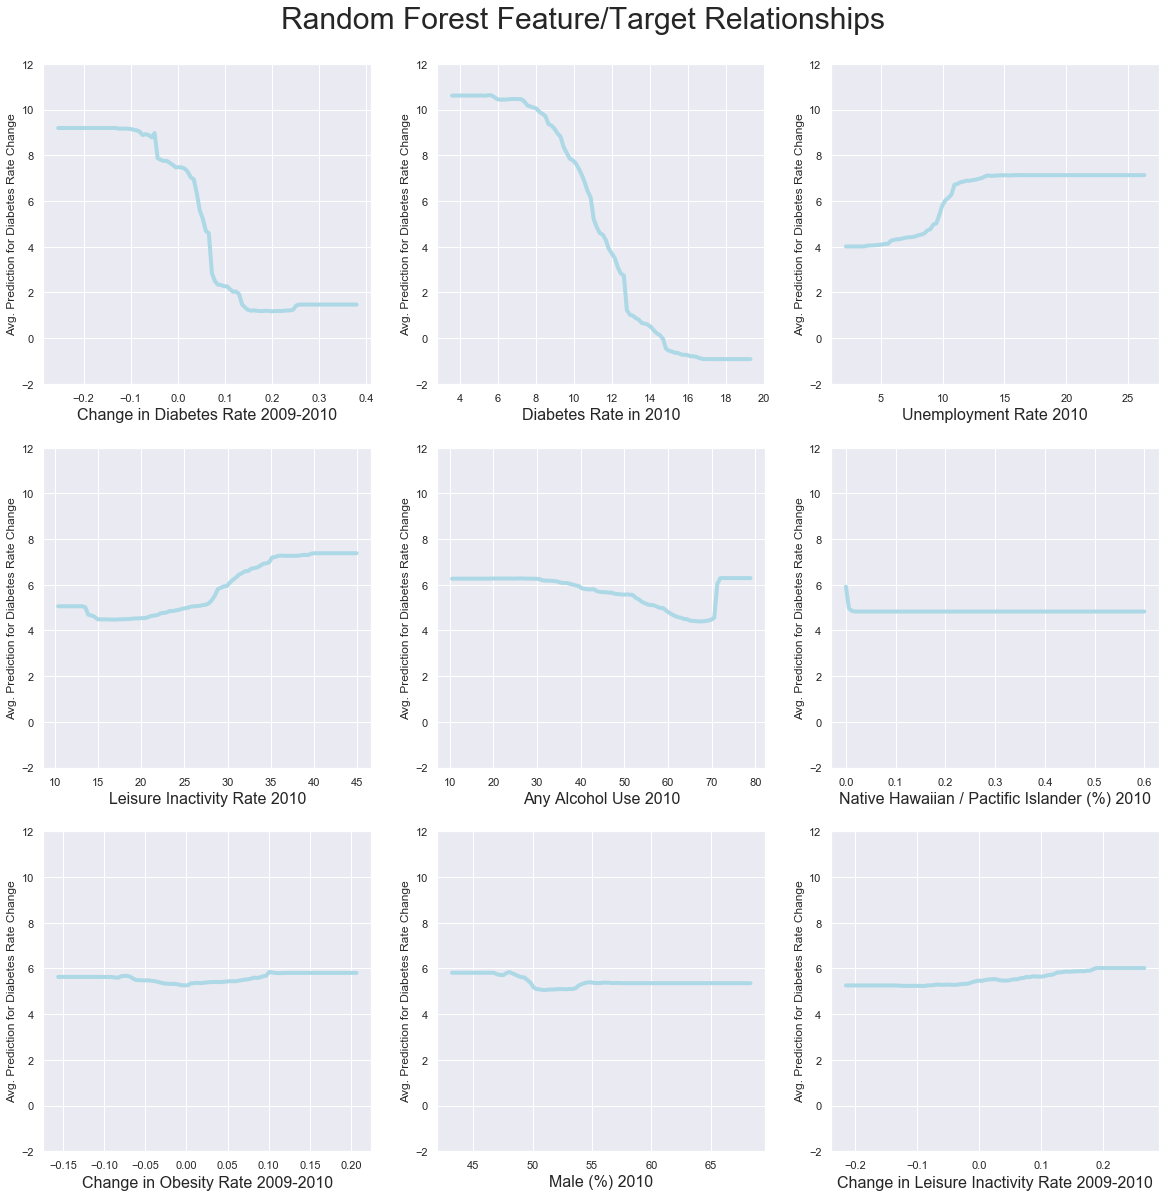

In [545]:
matplotlib.rcParams.update({'font.size': 16})


fig, axs = plt.subplots(3, 3, figsize=(20,20))
af = axs.flatten()
fig.suptitle("Random Forest Feature/Target Relationships",  fontsize=30, y = .92)


for i, col in enumerate(top_9_rf_feats):
    pdp_same_axis(rfbest, col, 100, af[i], -2, 12)
    
fig.subplots_adjust(hspace=.2)

plt.savefig('../images/rfrelationships.png')


# REGULARIZED SM MODELS STATS

In [ ]:
LASSO 

In [259]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [260]:
X_train_scaled_const = sm.add_constant(X_train_scaled)

In [271]:
modelsmlasso = sm.OLS(y_train,X_train_scaled_const)


In [278]:
results = modelsmlasso.fit_regularized() #alpha = .5, L1_wt = 1, method='elastic_net', maxiter = 1000

In [279]:
results.summary()

In [257]:
# lassobest = Lasso(alpha =  .5, max_iter = 1000)

OLS  #1 is lasso fit




TypeError: fit_regularized() missing 1 required positional argument: 'self'

In [283]:
model = sm.OLS(y_train, X_train_scaled_const)
results_fu = model.fit()

results_fr = model.fit_regularized(L1_wt=0, alpha=.5)


In [284]:
results_fr.params

array([ 3.58465880e+00, -2.35908181e+00,  8.49699329e-01, -2.90500802e-01,
       -1.47253237e-01,  4.02270535e-02,  4.49052502e-01, -1.23864322e-01,
        5.11056917e-01, -5.17047900e-01, -5.91683103e-02,  5.84967443e-01,
       -5.54722255e-01,  3.10550110e-01,  2.79851643e-01,  2.84127525e-01,
       -3.95219334e-01, -2.09344149e-01,  1.32161594e-01, -1.08653413e-01,
        4.20739207e-02, -3.18612756e-01, -5.90418673e-01,  3.75259464e-01,
        4.93449956e-01,  8.02235045e-01, -2.76638691e-01, -9.41459855e-02,
       -1.50111876e-01, -2.31768621e-01,  2.08903979e-02, -6.16470701e-02,
       -1.29691085e-01, -2.24044987e-01,  1.00069336e-01,  2.04765119e-01,
        1.43589115e-01, -1.99678965e-01, -2.37520962e-01,  1.78803384e-01,
       -5.70442587e-02,  2.77524626e-01, -3.53053229e-01, -1.57399101e-02,
       -6.44718913e-02,  6.01608999e-01,  3.14041451e-01,  3.60635415e-01,
        8.25621949e-02,  2.76068398e-01,  3.73106028e-01, -7.40951790e-02,
        7.57149567e-01, -

In [285]:
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)


In [290]:
model.normalized_cov_params[:3, :3]

array([[ 4.54752160e-04,  6.13251854e-19,  8.94731490e-19],
       [ 6.13251854e-19,  2.75003091e-03, -2.29361705e-04],
       [ 8.94731490e-19, -2.29361705e-04,  1.57853862e-03]])

In [286]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     7.911
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.71e-68
Time:                        16:20:52   Log-Likelihood:                -8291.0
No. Observations:                2199   AIC:                         1.673e+04
Df Residuals:                    2125   BIC:                         1.715e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5847      0.228     15.737      0.000       3.138       4.031
x1            -2.3591      0.560     -4.212      0.000      -3.458      -1.261
x2             0.8497      0.424      2.002      0.045       0.017       1.682
x3            -0.2905      0.271     -1.072      0.284      -0.822       0.241
x4            -0.1473      0.268     -0.549      0.583      -0.673       0.379
x5             0.0402      0.418      0.096      0.923      -0.780       0.861
x6             0.4491      0.533      0.843      0.399      -0.595       1.493
x7            -0.1239      0.495     -0.250      0.802      -1.094       0.846
x8             0.5111      0.379      1.349      0.178      -0.232       1.254
x9            -0.5170      0.798     -0.648      0.517      -2.082       1.048
x10           -0.0592      0.546     -0.108      0.914      -1.130       1.012
x11            0.5850      2.520      0.232      0.816      -4.357       5.527
x12           -0.5547      1.603     -0.346      0.729      -3.698       2.589
x13            0.3106      1.175      0.264      0.792      -1.993       2.614
x14            0.2799      2.664      0.105      0.916      -4.944       5.503
x15            0.2841      2.287      0.124      0.901      -4.201       4.769
x16           -0.3952      2.262     -0.175      0.861      -4.830       4.040
x17           -0.2093      0.733     -0.286      0.775      -1.647       1.228
x18            0.1322      0.646      0.205      0.838      -1.134       1.398
x19           -0.1087      0.422     -0.257      0.797      -0.936       0.719
x20            0.0421      2.353      0.018      0.986      -4.572       4.656
x21           -0.3186      3.546     -0.090      0.928      -7.274       6.636
x22           -0.5904      2.028     -0.291      0.771      -4.567       3.387
x23            0.3753      2.954      0.127      0.899      -5.417       6.168
x24            0.4934      2.869      0.172      0.863      -5.132       6.119
x25            0.8022      2.861      0.280      0.779      -4.808       6.412
x26           -0.2766      2.834     -0.098      0.922      -5.834       5.281
x27           -0.0941      3.093     -0.030      0.976      -6.160       5.972
x28           -0.1501      2.490     -0.060      0.952      -5.033       4.733
x29           -0.2318      1.281     -0.181      0.856      -2.744       2.281
x30            0.0209      1.532      0.014      0.989      -2.983       3.025
x31           -0.0616      1.010     -0.061      0.951      -2.043       1.920
x32           -0.1297      2.634     -0.049      0.961      -5.296       5.036
x33           -0.2240      2.645     -0.085      0.932      -5.411       4.963
x34            0.1001      2.486      0.040      0.968      -4.774       4.975
x35            0.2048      2.984      0.069      0.945      -5.647       6.056
x3